# first, we read the data and then take a look at the data information.

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
def summary(df):
    """
    return - mean，std， missing data, the number of unique in each numeric columns
    it is all about continous features in dataframe
    """
    describe = df.describe()
    describe = describe.T
    total = len(df)
    describe['percentage of missing data'] = round((total - describe['count']) /total, 2)  #proportion of missing data
    describe['count'] = total
    describe['number of unique'] = df.apply(lambda x: len(x.unique())) 
    return (describe)

In [18]:
data_con = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
summary(data_con)

,count,mean,std,min,25%,50%,75%,max,percentage of missing data,number of unique
amount,6362620,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,0.0,5316900
oldbalanceOrg,6362620,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,0.0,1845844
newbalanceOrig,6362620,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,0.0,2682586
oldbalanceDest,6362620,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,0.0,3614697
newbalanceDest,6362620,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,0.0,3555499


In [8]:
def summary_cat(df):
    """
    return - proportion of missing data，the number of unique
    categorical features
    """
    describe = df.describe()
    describe = describe.T
    total = len(df)
    describe['percentage of missing data'] = round((total - describe['count']) /total, 2)  #proportion of missing data
    describe['count'] = total
    describe['number of unique'] = df.apply(lambda x: len(x.unique())) 
    describe['mode'] = df.apply(lambda x: x.value_counts().idxmax())   #most frequent cat
    describe['mode_freq'] = df.apply(lambda x: x.value_counts().max()) # frequency
    describe['second_mode'] = df.apply(lambda x: x.value_counts().index[1])   
    describe['second_mode_freq'] = df.apply(lambda x: x.value_counts()[1]) 
    describe = describe[['count', 'number of unique', 'percentage of missing data', 'mode',
                         'mode_freq', 'second_mode', 'second_mode_freq']]
    return (describe)

In [9]:
data_cat = data[['type', 'isFraud', 'isFlaggedFraud']]
summary_cat(data_cat)

,count,number of unique,percentage of missing data,mode,mode_freq,second_mode,second_mode_freq
isFraud,6362620,2,0.0,0,6354407,1,8213
isFlaggedFraud,6362620,2,0.0,0,6362604,1,16


this data has 11 columns and there is no missing data in it. 
Issue: the number of transactions which are flagged fraud is much less than the number of transactions which are fraud. It means maybe we need to reset a new cutoff to determine which transaction is fraud.

# Visualizations

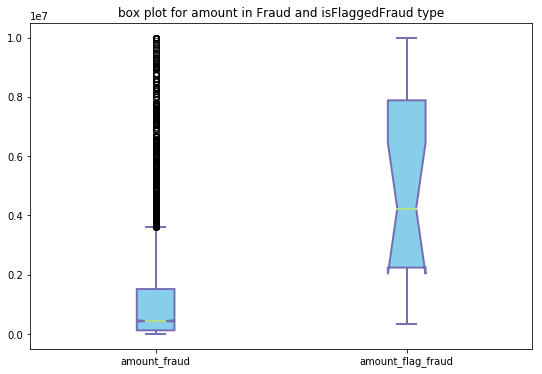

In [3]:
# 1 boxplot for the amount feature in isFraud =1 and isFlaggedFraud =1 category
amount_fraud = data[data.isFraud == 1]['amount']
amount_flag_fraud = data[data.isFlaggedFraud == 1]['amount']
amount_plot = [amount_fraud, amount_flag_fraud]
# Create a figure instance
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
bp = ax.boxplot(amount_plot, patch_artist=True, notch=True)

## change outline color, fill color and linewidth of the boxes  
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = 'skyblue' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['amount_fraud', 'amount_flag_fraud'])
plt.title('box plot for amount in Fraud and isFlaggedFraud type')
plt.show()

As we can see, the medium of amount of fraud is lower than the medium of amount of flag_fraud; therefore, maybe the cutoff of the flag_fraud needs to be changed in order to catch more fraud case.

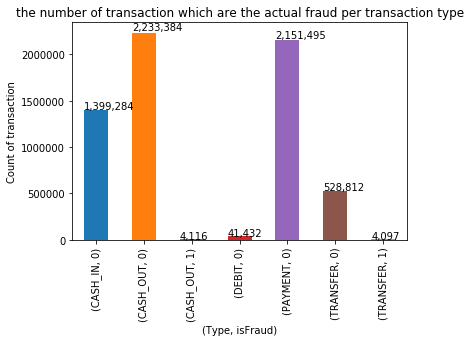

In [4]:
# 2 plot histgram which are the fraud per transaction type
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("the number of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

Only cash_out and transfer type can be fraud. Therefore, in the future modeling, we only focus on these two type.

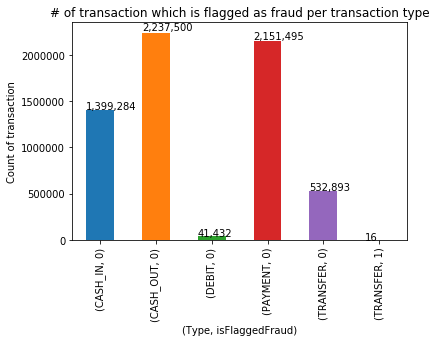

In [61]:
# 3 plot histgram which are the flagfraud per transaction type
ax = data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01)) # write number on the bar

It looks the simulation can flag only 16 transfer transactions as fraud. Let's look at those records and compare with the records which the system cannot catch them.

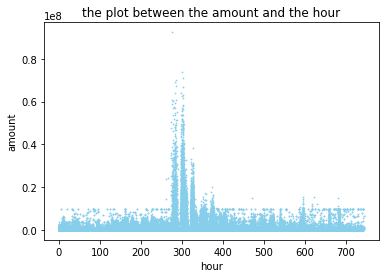

In [43]:
# 3 plot the amount and the step
plt.scatter(data.step, data.amount, color='skyblue', s = 0.5)
plt.xlabel('hour')
plt.ylabel('amount')
plt.title('the plot between the amount and the hour')
plt.show()

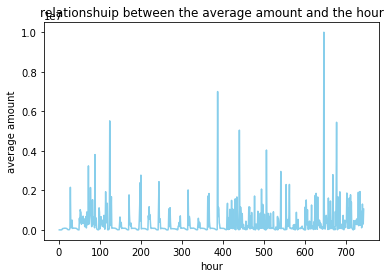

In [6]:
# 4 plot average the amount and the step
import numpy as np
hour = data.step.unique()
average = [np.median(data[data.step == i].amount)  for i in hour]
plt.plot(hour, average, color='skyblue', label='10x-v2-A')
plt.xlabel('hour')
plt.ylabel('average amount')
plt.title('relationshuip between the average amount and the hour')
plt.show()

as the plot shown above, the median of the amount in each hour has peroid pattern

In [ ]:
# 5 plot percentage of fraud case in every hour
import seaborn as sns
fraud_case = [sum(data[data.step == i].isFraud == 1)/len(data[data.step == i]) for i in hour]
case = [len(data[data.step == i]) for i in hour]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(hour, fraud_case, color="black", s = 1, label = 'fraud_case')
ax1.set_ylabel('the percentage of fraud_case')
l1 = plt.legend(bbox_to_anchor=(1.15, 0.15))

ax2 = ax1.twinx()  # this is the important function
ax2.plot(case, color="yellow", label = '# of transaction')
ax2.set_ylabel('the number of cases')
ax2.set_title('the number of cases in every hour/percentage of fraud case in every hour')
#ax2.set_xlabel('hour', fontsize=16)
ax2.set_ylabel('the number of cases of fraud')
#labels = ['fraud_case','# of transaction']
#plt.legend(handles=[l1],labels=labels[0],loc='center left')
plt.legend(bbox_to_anchor=(1.85, 0.15))
plt.gca().add_artist(l1)
plt.show()

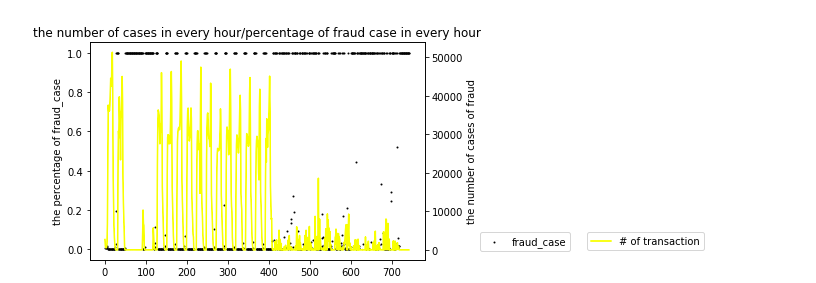

In [48]:
im_final

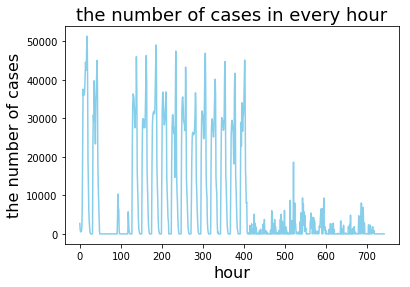

In [44]:
# 6 plot amount of transaction cases in every hour
case = [len(data[data.step == i]) for i in hour]
plt.plot(case, color="skyblue")
plt.title('the number of cases in every hour', fontsize=18)
plt.xlabel('hour', fontsize=16)
plt.ylabel('the number of cases', fontsize=16)
plt.show()

As the plot shown above, there is two conditions in the whole hours, one is before 400 hours and one is after 400 hours. Also, we can see, before 300 hours, when the number of transcation cases in small, the percentage of fraud cases is almost 1, which means if the number of transcation cases is small in a certain hour, maybe we can say all of them are fraud. Therefore, we need to take the variable step into consideration for future modeling.

# Modeling using Logistic Regression and XGBoost

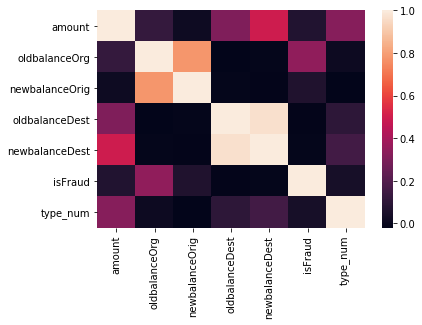

In [65]:
from statsmodels.tools import categorical

# Keep only interested transaction type ('TRANSFER', 'CASH_OUT')
# plot the heatmap of different features
import matplotlib.cm as cm
tmp = data[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
tmp.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
new = tmp.reset_index(drop=True)
a = np.array(tmp['type'])
b = categorical(a, drop=True)
new['type_num'] = b.argmax(1)

# plot the heatmap
sns.heatmap(new.corr())

Firstly, we need to split data into two part, one is before 400 hours, one is after 400 hours.

data cleansing:
1 drop other types
2 transfer variable type to dummy variable 
3 split data into two seperate group using step

In [49]:
# drop other types
data = data[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
# transfer to dummy variable 
dummy = pd.get_dummies(data['type'])  
data = pd.concat((data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 
                        'newbalanceDest', 'isFraud']], dummy[['TRANSFER']]), axis = 1) 

data_1 = data[data.step < 400]
data_2 = data[data.step >= 400]
data_1.drop(['step'], axis=1, inplace=True)
new_1 = data_1.reset_index(drop=True)
data_2.drop(['step'], axis=1, inplace=True)
new_2 = data_2.reset_index(drop=True)
print (new_1.head())
print (new_2.head())

/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0     181.00          181.0             0.0             0.0            0.00   
1     181.00          181.0             0.0         21182.0            0.00   
2  229133.94        15325.0             0.0          5083.0        51513.44   
3  215310.30          705.0             0.0         22425.0            0.00   
4  311685.89        10835.0             0.0          6267.0      2719172.89   

   isFraud  TRANSFER  
0        1         1  
1        1         0  
2        0         0  
3        0         1  
4        0         1  
       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0  1151981.33       19961.00             0.0       401552.02      1553533.36   
1  1305558.68      102651.73             0.0      4178031.32      5483589.99   
2    88950.10       30280.00             0.0            0.00        88950.10   
3    12821.40       96367.00         83545.6            0.00       

## For data1, modeling
### notes: my computer can not afford such big data, so I just random sample data.

In [101]:
# now, using logistics regression to do classfication
## for data1 
## 1 split into training and validation data
## 2 fit the model
## 3 Predict values using the test indices in the testing data
## 4 Calculate the recall score
import sklearn
x_1 = new_1[['amount',  'oldbalanceOrg',  'newbalanceOrig',  'oldbalanceDest',  'newbalanceDest', 'TRANSFER']]
Y_1 = new_1['isFraud']
x_train_1, x_test_1, y_train_1, y_test_1 = sklearn.model_selection.train_test_split(x_1, Y_1, train_size = 0.8)


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.model_selection
import sklearn.metrics

In [128]:
# using k-fold to fit the model
def Kfold_scores(x_train_data, y_train_data, kfoldnum , c_array):
    """
    using k-fold cross validation to fit the model
    kfoldnum - the number of k in cross validation
    c_array - is the learning rate 
    """
    fold = StratifiedKFold(kfoldnum, random_state=None, shuffle=False)  # define K-Fold

    results_table = pd.DataFrame(index = range(len(c_array),3), columns = ['C_parameter','Mean recall score', 'Mean precision score'])
    results_table['C_parameter'] = c_array

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_array:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        precision_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data, y_train_data),start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0]])

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:])

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = sklearn.metrics.recall_score(y_train_data.iloc[indices[1]],y_pred_undersample)
            recall_accs.append(recall_acc)
            
            precision_acc = sklearn.metrics.precision_score(y_train_data.iloc[indices[1]], y_pred_undersample)
            precision_accs.append(precision_acc)
            print("Iteration {}: recall score = {:.4f}, precision score = {:.4f}".format(iteration, recall_acc, precision_acc))

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        results_table.ix[j, 'Mean precision score'] = np.mean(precision_accs)
        j += 1
        print('')
        print('Mean recall score'.format(np.mean(recall_accs)))
        print('Mean precision score'.format(np.mean(precision_accs)))
        print('')

    best_c = results_table[results_table['Mean recall score'] == 
                               np.max(results_table['Mean recall score'])]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return (best_c)

In [155]:
# use function printing_Kfold_scores to find the best hyper-parameter
## notes: my computer can not afford such a big data, so I random sample data.
Kfold_scores(x_train_1.iloc[:100000], y_train_1.iloc[:100000], kfoldnum = 5, c_array = [0.01, 0.1, 1])

-------------------------------------------
C parameter:  0.01
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.4474, precision score = 0.8947


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.4474, precision score = 1.0000


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3: recall score = 0.4474, precision score = 0.9444
Iteration 4: recall score = 0.4865, precision score = 0.9000


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.4054, precision score = 1.0000

Mean recall score
Mean precision score

-------------------------------------------
C parameter:  0.1
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.4474, precision score = 0.8500


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.4474, precision score = 0.9444


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3: recall score = 0.4474, precision score = 0.8947
Iteration 4: recall score = 0.4865, precision score = 0.9000


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.4054, precision score = 1.0000

Mean recall score
Mean precision score

-------------------------------------------
C parameter:  1
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.4474, precision score = 0.7727


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.5000, precision score = 0.9500


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3: recall score = 0.4211, precision score = 0.8889
Iteration 4: recall score = 0.4865, precision score = 0.9000


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.4054, precision score = 1.0000

Mean recall score
Mean precision score

*********************************************************************************
Best model to choose from cross validation is with C parameter =  2    1.0
Name: C_parameter, dtype: float64
*********************************************************************************


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2    1.0
Name: C_parameter, dtype: float64

In [159]:
# fit the model
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(x_train_1.iloc[:4000000,:],y_train_1.iloc[:4000000])
y_pred = lr.predict(x_test_1)
cnf_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test_1)


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
cnf_matrix

array([[502037,    533],
       [    66,    393]])

## For data2, modeling

In [129]:
# now, using logistics regression to do classfication
## for data1 
## 1 split into training and validation data
## 2 fit the model
## 3 Predict values using the test indices in the testing data
## 4 Calculate the recall score
import sklearn
x_2 = new_2[['amount',  'oldbalanceOrg',  'newbalanceOrig',  'oldbalanceDest',  'newbalanceDest', 'TRANSFER']]
Y_2 = new_2['isFraud']
x_train_2, x_test_2, y_train_2, y_test_2 = sklearn.model_selection.train_test_split(x_2, Y_2, train_size = 0.8)

# use function printing_Kfold_scores to find the best hyper-parameter
## notes: my computer can not afford such a big data, so I random sample data.
Kfold_scores(x_train_2.iloc[:1000000], y_train_2.iloc[:1000000], kfoldnum = 5, c_array = [0.01, 0.1, 1])

-------------------------------------------
C parameter:  0.01
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.5970, precision score = 0.8933


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.6418, precision score = 0.9021


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3: recall score = 0.6070, precision score = 0.9196


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4: recall score = 0.6711, precision score = 0.8707


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.5897, precision score = 0.9103

Mean recall score
Mean precision score

-------------------------------------------
C parameter:  0.1
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.6003, precision score = 0.9027


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.6434, precision score = 0.9194
Iteration 3: recall score = 0.6136, precision score = 0.8981


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4: recall score = 0.6744, precision score = 0.8750


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.5963, precision score = 0.8975

Mean recall score
Mean precision score

-------------------------------------------
C parameter:  1
-------------------------------------------



/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1: recall score = 0.6003, precision score = 0.9005


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2: recall score = 0.6451, precision score = 0.9131


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3: recall score = 0.6153, precision score = 0.8983


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4: recall score = 0.6744, precision score = 0.8731


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5: recall score = 0.5997, precision score = 0.9002

Mean recall score
Mean precision score

*********************************************************************************
Best model to choose from cross validation is with C parameter =  2    1.0
Name: C_parameter, dtype: float64
*********************************************************************************


/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2    1.0
Name: C_parameter, dtype: float64

In [161]:
# using c = 0.1 to fit the model
## fit the model
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(x_train_2.iloc[:100000,:],y_train_2.iloc[:100000])
## prediction
y_pred = lr.predict(x_test_2)
cnf_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test_2)

/Users/rain/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Visualize the test results using ROC CURVE

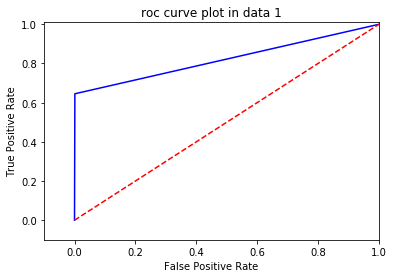

In [163]:
# for data 1
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test_1,y_pred)
roc_auc = sklearn.metrics.auc(fpr,tpr)

# Plot ROC
plt.title('roc curve plot in data 1')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
#plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

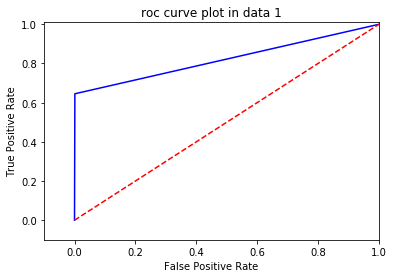

In [162]:
# for data 2
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test_2,y_pred)
roc_auc = sklearn.metrics.auc(fpr,tpr)

# Plot ROC
plt.title('roc curve plot in data 1')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
#plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [61]:
x = data[['step', 'amount',  'oldbalanceOrg',  'newbalanceOrig',  'oldbalanceDest',  'newbalanceDest', 'TRANSFER']]
y = data['isFraud']
trainX, testX, trainY, testY = sklearn.model_selection.train_test_split(x, y, train_size = 0.8)

In [62]:
# Long computation in this cell (~1.8 minutes)
from xgboost.sklearn import XGBClassifier
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX.iloc[:1000000,:], trainY.iloc[:1000000]).predict_proba(testX)
print('AUPRC = {}'.format(sklearn.metrics.average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.8998526314480093


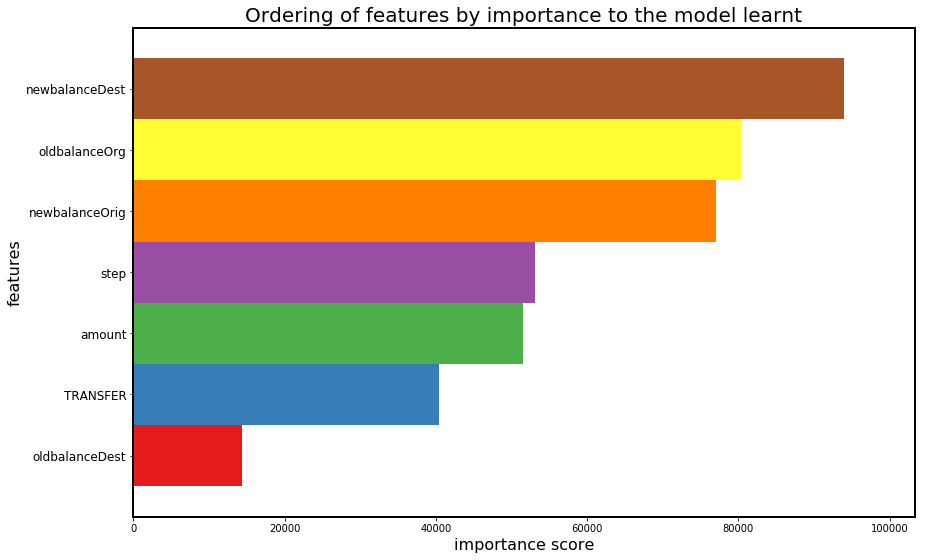

In [63]:
from xgboost import plot_importance, to_graphviz
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

improve results: we need more features to classifier, also, I think we need to try more methods not just two classification
assumptions: 
Assumptions of Logistic Regression
Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.